In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split

### Генерация данных

In [397]:
np.random.seed(0)
l = 500
n = 2
X1 = np.array([[-1,-1]]) + 0.5*np.random.randn(l, n)
X2 = np.array([[1,1]]) + 0.5*np.random.randn(l, n)

X = np.vstack([X1, X2])
y = np.hstack([[-1]*l, [1]*l])


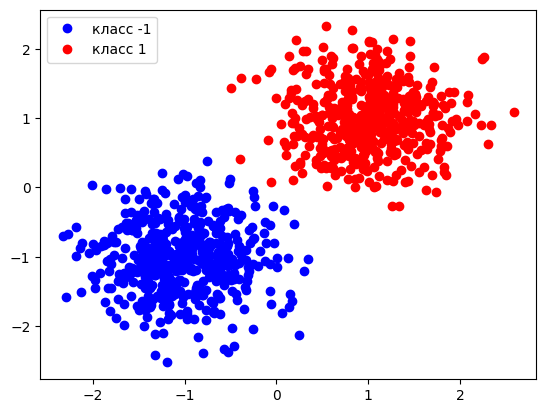

In [398]:
cols = ['blue', 'red']

# построение точек
for k in np.unique(y):
    if k == -1: col = cols[0]
    else: col = cols[1]
    plt.plot(X[y==k,0], X[y==k,1], 'o', label='класс {}'.format(k), color=col)

plt.legend(loc='best')
plt.show()

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

### Метод PLA


\begin{align}
y(x_i) = sign(<w, x_i> + w_0)
\end{align}
Функция потерь
\begin{align}
L_i (w, w_0) = - y_i(<w, x_i> +w_0)
\end{align}

\begin{align}
Q (w,w_0) = \sum_{} {L_i(w, w_0)} = - \sum_{} {y_i(<w, x_i> +w_0)}
\end{align}
Правило обучения: добавить к $w, w_0$ для произвольного $ y_i \ne \hat{y_i}$
$$\left\{\begin{array}{}
  w^{(t+1)} = w^{(t)} + h*y_i* x_i  \\
  w_0^{(t+1)} = w_0^{(t)} + h*y_i\\
  \end{array}
  \right.
$$
где h - темп обучения



In [ ]:
class Perceptron:
    def __init__(self, x, y, lr = 1, lamda = 0):
        self.length = len(x)
        self.x = x
        self.y = y
        self.lr = lr
        self.lamda = lamda
        self.w0 = 0
        self.w = np.zeros(len(self.x[0]))

    def predict(self, w, w0, x):
        y_predict = np.dot(x, w) + w0
        if y_predict >= 0: y_predict = 1
        else: y_predict = -1
        return y_predict

    def update(self, y_i, x_i):
        self.w += self.lr*y_i*x_i
        self.w0 += self.lr*y_i

    def train(self, epochs = 100):
        Finish = False
        count = 0
        while not Finish:
            count += 1
            err = 0
            yy = 0
            xx = np.zeros(len(self.x[0]))
            for i in range(self.length):
                x_i = self.x[i]
                y_i = self.y[i]
                # print(y_i, self.predict(self.w, self.w0, x_i), count - epochs)

                if self.predict(self.w, self.w0, x_i)!= y_i :
                    err += 1
                    yy = y_i
                    xx = x_i
            # Update last element
            self.update(yy, xx)

            if err == 0 or count >= epochs: Finish = True
            # print(self.w, self.w0)

        return self.w, self.w0


    def eval(self,X_test, y_test):
        count = 0
        samples = len(y_test)
        y_predict = np.zeros(len(y_test))
        for i in range(len(X_test)):
            x_i = X_test[i]
            y_i = y_test[i]
            y_predict[i] = self.predict(self.w, self.w0, x_i)
            if y_i * y_predict[i] == 1: count += 1
        score = count/samples * 100
        return y_predict, score
    def show_graph(self):
        cols = ['blue', 'red']

        # построение точек
        for k in np.unique(y_train):
            if k == -1: col = cols[0]
            else: col = cols[1]
            plt.plot(X_train[y_train==k,0], X_train[y_train==k,1], 'o', label='класс {}'.format(k), color=col)

        if self.w[1] != 0:
            b = - self.w0/self.w[1]
            k = - self.w[0]/self.w[1]
        else:
            pass
        x_axis = np.linspace(-1, 1)
        y_axis = k* x_axis + b
        plt.plot(x_axis, y_axis, linewidth=2)
        plt.legend(loc='best')
        plt.show()



In [ ]:
model = Perceptron(X_train, y_train, lr = 0.5)
model.train(epochs = 1000)

(array([0.56511616, 1.05774768]), 0.0)

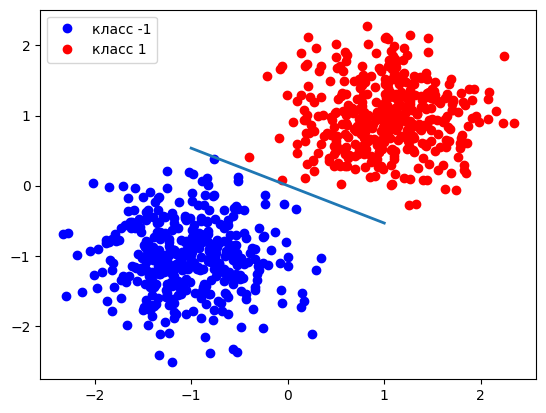

In [ ]:
model.show_graph()


In [ ]:
_ ,score = model.eval(X_test, y_test)
score

100.0

### SVM

обучающая выборка $X^l = (x_i, y_i)_{i = 1}^l$
Линейный классификатор
$$ a(w, x) = sign(<w, x> - w_0)$$

Разделяющая плоскость $$<w, x> = w_0$$
Функция потерь
$$ Q(w, w_0) = \sum_{i = 1}^l{[y_i(<w, x_i> -w_0) \le 0]}$$

**Оптимальная разделяющая плоскость** : максимально далеко отстояла от ближайших к ней точек обоих классов. То есть максимизация зазора между классами.

Пусть $ \underset{i= 1, 2,..l}{min}[y_i (<x_i, w> - w_0)] = 1$, тогда ширина полосы
$$ \frac{<(x_+, x_-), w>}{||w||} = \frac{2}{||w||} \rightarrow max$$

Наша задача
$$\left \{
\begin{array}{}
||w||^2 \rightarrow min \\
y_i(<w, x_i> - w_0) \ge 1 \\
\end{array}{}
\right.


### Квадратичное программирование


Задачи минимизации расстояния от точки M до выпуклой области
$$ x = \underset{x}{argmin} ||x- M||^2$$
при условии
$$ Ax \preceq b$$


Нам интересна только граница этой области $$Ax = b$$
Лагранжиан
$$ \left \{
    \begin{array}{}
    L(\lambda, x) = \frac{1}{2} (x - M)^T(x-M) + \lambda^T (A x - b)\\
    A x = b\\
    \end{array}
    \right.
$$
при условии $\lambda_i \ge 0$
$$L(\lambda, x) = \frac{1}{2} (x - M)^T(x-M) + \lambda^T (A x - b) $$
$$= \frac{1}{2}((x_1 - M_1)^2 + (x_2 - M_2)^2) + \lambda^T (A x - b) $$
$$= \frac{1}{2} (x_1^2 + x_2^2) - M_1x_1-M_2x_2 + 1/2 (M_1^2+M_2^2) +  \lambda^T (A x - b)$$
$$ =\frac{1}{2} x^T x + x^Tq + C + \lambda^T (A x - b)$$
$ q = (-M_1, -M_2)^T$

Решение
$$ \left \{
    \begin{array}{}
    \frac{dL}{dx} = x^*+ q+  A^T \lambda^* = 0\\
    Ax^* = b\\
    \end{array}
    \right.
    \Rightarrow
    \left(
    \begin{array}{}
    I & A^T\\
    A & O\\
    \end{array}
    \right)
    \left(
    \begin{array}{}
    x^*\\
    \lambda^*\\
    \end{array}
    \right)
    = \left(
    \begin{array}{}
    -q\\
    b\\
    \end{array}
    \right)
$$



### Это некорректное решение

Решить СЛАУ Ax = b
Нужно разложить
$$
A = LU
$$
$$
L = \left(
    \begin{array}{}
    1 & 0 & 0 & ..\\
    l_{21} & 1 & 0 & .. \\
    l_{31} & l_{32} & 1 & ..\\
    l_{n1} & l_{n2} & .. & 1 \\
    \end{array}
    \right)

U = \left(
    \begin{array}{}
    u_{11} & u_{12} & u_{13} & ..\\
    0 & u_{22} & u_{23} & .. \\
    0 & 0 & u_{33} & ..\\
    0 & 0 & .. & u_{nn} \\
    \end{array}
    \right)
$$
Тогда $$a_{ij }= \sum_{k = 1}^nl_{ik}u_{kj} = \left \{
    \begin{array}{}
    \sum_{k=1}^il_{ik}u_{kj} = \sum_{k = 1}^{i-1}l_{ik}u_{kj} + u_{ij} & if & i \le j\\
    \sum_{k = 1}^j l_{ik}u_{kj} = \sum_{k = 1}^{j -1}l_{ik}u_{kj} + l_{ij} * u_{jj} & if & i >j
    \end{array}{}
    \right.$$
Отсюда, получил алгоритм

for i = 1:n

----for j = 1:n

--------$u_{ij} = a_{ij} - \sum_{k = 1}^i l_{ik}u_{kj} $ if  $i \le j$

--------$l_{ij} = \frac{a_{ij} - \sum_{k = 1}^j l_{ik}u_{kj} }{u_{jj}} $ if $i > j$


In [ ]:
def LU(A):

    n = len(A[0])
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    for i in range(n): L[i][i] = 1
    for i in range(n):
        for j in range(n):
            if i <= j :
                r = 0
                for k in range(i):
                    r += L[i][k] * U[k][j]
                U[i][j] = A[i][j] - r
            if i > j:
                r = 0
                for k in range(j):
                    r += L[i][k] * U[k][j]
                L[i][j] = (A[i][j] - r) / U[j][j]
    return L, U
def result_Clau(A, b):
    n = len(b)
    L, U = LU(A)
    y = np.zeros((n, 1))
    y[0] = b[0]
    for i in range(1, n):
        r = 0
        for k in range(i):
            r += L[i][k] * y[k]
        y[i] = b[i] - r

    x = np.zeros((n, 1))
    x[n -1] = y[n-1]/ U[n-1][n-1]
    for i in range(n - 2, -1, -1):
        r = 0
        for k in range(i, n):
            r += U[i][k] * x[k]
        x[i] = (y[i] - r)/ U[i][i]
    return y, x


In [ ]:
A = [[1, 2],[3,4]]
b = np.array([[2],[3]])

In [ ]:
A_inv = np.linalg.inv(A)
x1 = A_inv.dot(b)
x1

array([[-1. ],
       [ 1.5]])

In [ ]:
_, x = result_Clau(A, b)
x

array([[-1. ],
       [ 1.5]])

In [ ]:
a = np.zeros([2,2])
a

array([[0., 0.],
       [0., 0.]])

In [ ]:
a.transpose()


array([[0., 0.],
       [0., 0.]])

### Минимальное расстояние от точки M до выпуклой оболочки Ax = b

использовать код CVXOPT

In [31]:
from cvxopt import matrix, solvers
I = matrix([[1., 0.], [0., 1.]])
q = matrix([-10., -10.])
A = matrix([[1., 2., 1., -1., 0.], [1., 1., 4., 0., -1.]])
b = matrix([10., 16., 32., 0., 0])

solvers.options['show_progress'] = False
sol = solvers.qp(I, q, A, b)

print('Solution:')
print(sol['x'])

Solution:
[ 5.00e+00]
[ 5.00e+00]



### Построить выпуклую оболочку точек на плоскости - алгоритм Джарвиса


In [447]:
import math

def angle(A, B):
    y = B[1] - A[1]
    x = B[0] - A[0]
    if x == 0:
        ang = math.pi / 2
    elif x > 0: ang = math.atan(y/x)
    else: ang = math.atan(y/x) + math.pi

    # -Pi/2 <ang < 3Pi/2
    if ang <0 : ang += 2* math.pi #  0 < ang < 2Pi

    return ang

def rotation_angle(p_prev, p_now, P):
    ang1 = angle(p_prev, p_now)
    ang2 = angle(p_now, P)
    if ang2 >= ang1: aa = ang2 - ang1
    else: aa = ang2 + 2*math.pi-ang1
    return aa

def Jarvis(X):
    Indexs = list(range(len(X)))
    P = []

    p0 = X[0]
    for A in X:
        if p0[1] > A[1] or (p0[1] == A[1] and p0[0] < A[0]): p0 = A
    P.append(p0)

    if X[0][0] != p0[0]:
        p1 = X[0]
        ind = 0
    else:
        p1 = X[1]
        ind = 1

    # Find p1
    min = rotation_angle([p0[0] - 1,  p0[1]], p0, p1)
    for i in Indexs:
        if i == ind : continue
        A = X[i]
        roto = rotation_angle([p0[0] - 1,  p0[1]], p0, A)
        if min > roto:
            min = roto
            p1 = A
            ind = i
    P.append(p1)
    Indexs.remove(ind)

    Finish = False
    while Finish == False:
        p_now = P[-1]
        p_prev = P[-2]
        ind = Indexs[0]
        p_next=X[ind]
        min = rotation_angle(p_prev, p_now, p_next)

        for i in Indexs:
            if i == ind: continue
            A = X[i]
            roto = rotation_angle(p_prev, p_now, A)
            if min > roto:
                min = roto
                p_next = A
                ind = i
            if min == roto :
                len1 = math.sqrt((A[0]- p_now[0])* (A[0]- p_now[0]) + (A[1]- p_now[1])* (A[1]- p_now[1]))
                len2 = math.sqrt((p_next[0]- p_now[0])* (p_next[0]- p_now[0]) + (p_next[1]- p_now[1])* (p_next[1]- p_now[1]))
                if len1 > len2:
                    ind  = i
                    p_next = A
        Indexs.remove(ind)
        P.append(p_next)
        # print(P, Indexs)

        if p_next == p0: Finish = True
    return P



Построить оболочку из множества точек

In [448]:
# Построить прямую из двух точек
def linear(point1, point2):
    if point1[0] - point2[0] != 0:
        a1 = -(point1[1] - point2[1])/(point1[0]- point2[0])
        a2 = 1
        b = a1 * point1[0] + a2*point1[1]
    else:
        a1 = 1
        a2 = 0
        b = point1[0]
    return a1, a2, b

def hull(P):
    A =[]
    bb =[]
    for i in range(len(P)-1):
        a1, a2, b = linear(P[i], P[i+1])
        for p in P:
            conf = a1*p[0] + a2*p[1]
            if conf == b: continue
            elif conf < b: break
            else:
                a1 = -a1
                a2 = -a2
                b = -b
                break
        A.append([a1,a2])
        bb.append(b)
    return A, bb

### SVM

Получить расстояние двух выпуклой области на плоскости. Это мимимальное расстояние между вершин одной выпуклой оболочки до другой оболочки

Максимальная полоса будет этом расстоянием. Разделяющая плоскость - Серединный перпендикуляр отрезка расстояния

In [451]:
from base64 import b16encode
from cvxopt import matrix, solvers
import math
import matplotlib.pyplot as plt

def sign(a):
    res = -1
    if a >= 0: res = 1
    return res
class SVM:
    def __init__(self, x, y): # x, y - np.array
        self.x = x
        self.y = y
        self.w = np.zeros(len(self.x[0]))
        self.w0 = 0
        self.margin = 0
        self.supportPoint1 = np.zeros(len(self.x[0]))
        self.supportPoint2 = np.zeros(len(self.x[0]))
        self.length = len(x)
        self.P = None
        
    def fit(self):
        cls1 = []
        cls2 = []
        for i in range(self.length):
            if self.y[i] == 1: cls1.append(self.x[i].tolist())
            else: cls2.append(self.x[i].tolist())
        P1 =Jarvis(cls1)
        P2 = Jarvis(cls2)
        
        A1, b1  = hull(P1)
        A2, b2 = hull(P2)
        
        # use matrix for CVXOPT
        I = matrix([[1., 0.], [0., 1.]])

        AA1 = matrix(np.array(A1))
        AA2 = matrix(np.array(A2))
        bb1 = matrix(b1)
        bb2 = matrix(b2)
        
        solvers.options['show_progress'] = False
        p0 = P1[0]
        argPoint = matrix(p0)
        sol = solvers.qp(I, -matrix(p0), AA2, bb2)
        argX = sol['x'] # x- matrix 2x1
        vectorR = argX - matrix(p0)
        margin = math.sqrt(vectorR[0]*vectorR[0] + vectorR[1]*vectorR[1])

        for p in P1:
            if p0 == p: continue
            sol = solvers.qp(I, -matrix(p), AA2, bb2)
            x = sol['x'] # x- matrix 2x1
            vectorR = x - matrix(p)
            R =math.sqrt(vectorR[0]*vectorR[0] + vectorR[1]*vectorR[1])
            if R < margin:
                margin = R
                argX = x
                argPoint = matrix(p)

        for p in P2:
            sol = solvers.qp(I, -matrix(p), AA1, bb1)
            x = sol['x'] # x- matrix 2x1
            vectorR = x - matrix(p)
            R =math.sqrt(vectorR[0]*vectorR[0] + vectorR[1]*vectorR[1])
            if R < margin:
                margin = R
                argX = x
                argPoint = matrix(p)

        M = (argX + argPoint)/2
        
        self.w = np.array(argPoint - argX).transpose()[0]
        self.w0 = self.w.dot(np.array(M))[0]
        self.supportPoint1 = np.array(argPoint).transpose()[0]
        self.supportPoint2 = np.array(argX).transpose()[0]
        self.P = [P1, P2]
        
        return self.margin, self.w, self.w0
    def predict(self, X, Y):
        count = 0
        Y_pred = []
        for i in range(len(X)):
            y_pred= sign(self.w.dot(X[i]) - self.w0)
            Y_pred.append(y_pred)
            if y_pred != Y[i]: count += 1
        err = count/len(X)
        return Y_pred, err
    
    def vizualization(self):
        cols = ['blue', 'red']
        x_values = np.linspace(min(self.x[:,0]), max(self[:, 0]), 100)
        
        if self.w[1] != 0:
            y0_values = self.w0/self.w[1] * np.ones(100)- self.w[0]/self.w[1] * x_values
            b1 = self.w.dot(self.supportPoint1)
            b2 = self.w.dot(self.supportPoint2)
            y1_values = b1/self.w[1] * np.ones(100)- self.w[0]/self.w[1] * x_values
            y2_values = b2/self.w[1] * np.ones(100)- self.w[0]/self.w[1] * x_values
            

        # построение точек
        for k in np.unique(self.y):
            if k == -1: col = cols[0]
            else: col = cols[1]
            plt.plot(self.x[self.y==k,0], self.x[self.y==k,1], 'o', label='класс {}'.format(k), color=col)
        for p in self.P[0]:
            plt.plot(p[0], p[1], 'o',color='green')

        for p in self.P[1]:
            plt.plot(p[0], p[1], 'o', color='black')
            
        plt.plot(x_values, y0_values)
        plt.plot(x_values, y1_values)
        plt.plot(x_values, y2_values)
        
        plt.plot(self.supportPoint1[0], self.supportPoint1[1], 'x', color = 'orange')
        plt.plot(self.supportPoint2[0], self.supportPoint2[1], 'x', color = 'orange')
        plt.legend(loc='best')
        plt.show()

0.0


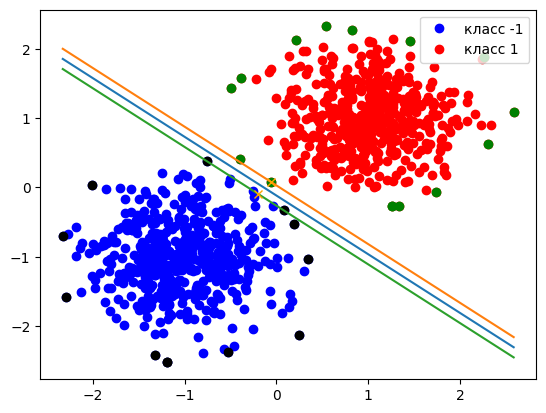

In [452]:

model = SVM(X,y)
model.fit()
_, err = model.predict(X_test, y_test)
print(err)
model.vizualization()
